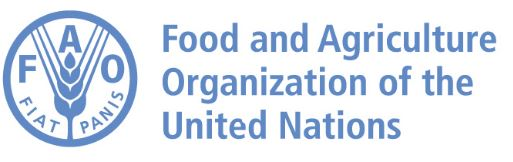


Dans le cadre de ma formation, j'ai pour mission de donner un panorama de l’état de la malnutrition dans le monde, à partir des données fournit sur le site de l'Organisation des Nations Unies pour l'alimentation et l'agriculture. Je détaille mon analyse, à l'aide des questions de ce notebook.

# <font color=1683BE> **REALISATION D'UNE ETUDE DE SANTE PUBLIQUE**

---



---



## <font color=1683BE>**Préparation des données**

---



In [ ]:
#Importation des bibliotheques Pandas & Numpy
import pandas as pd
import numpy as np 

#Importation des fichiers : population & sous nutrition
population = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P4_Ehouman_Yann/population.csv')
sous_nutrition = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P4_Ehouman_Yann/sous_nutrition.csv')

#Conversion de la colonne 'valeur' en valeur numerique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

#Les valeurs Nan sont remplacées part des zeros
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

#Renommer les colonnes 'valeur' en 'population' et 'nb population' en 'sous nutrition'
population.rename(columns={"Valeur": "Population"}, inplace=True)
sous_nutrition.rename(columns={"Valeur": "nb_pop_sous_nutrition"}, inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Création d'un data frame : l'union du data frame population & sous nutrition, avec le filtre année 2017
prop_sous_nutrition = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',["Zone", "nb_pop_sous_nutrition"]],
                               on='Zone')

In [ ]:
#Conversion des colonnes "Population" & "Nb de population en sous nutrition" en Millions d'habitant
prop_sous_nutrition['Population'] = prop_sous_nutrition['Population'] * 1000
prop_sous_nutrition['nb_pop_sous_nutrition'] = prop_sous_nutrition['nb_pop_sous_nutrition'] * 1000000 

## <font color=1683BE>**La proportion de personnes en état de sous-nutrition ?**

---





In [ ]:
print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(prop_sous_nutrition['nb_pop_sous_nutrition'].sum()*100/prop_sous_nutrition['Population'].sum()), "%")

Proportion de personnes en état de sous nutrition : 7.10 %


## <font color=1683BE>**Le nombre théorique de personnes qui pourraient être nourries ?**

---



In [ ]:
#Importation de fichiers "aide alimentaire" & "dispo alimentaire"
aide_alimentaire = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P4_Ehouman_Yann/aide_alimentaire.csv')
dispo_alimentaire = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P4_Ehouman_Yann/dispo_alimentaire.csv')

#Conversion en millions d'habitant la colonne population du dataframe "Population"
population['Population'] *=1000

In [ ]:
#Conversion des colonnes en milliers de tonne en kg
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    dispo_alimentaire[elt] *= 1000000

#Remplacement des valeurs nulles en zero
dispo_alimentaire.fillna(value=0, inplace=True)


In [ ]:
#La disponibilité alimentaire en 2017
dispo_alimentaire = dispo_alimentaire.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                                            on='Zone')
#Calcul de la disponibitié en Kcal 
dispo_alimentaire['dispo_kcal'] = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire['Population'] * 365

#Somme total de disponibilté alimentaire en kcal
dispo_alimentaire['dispo_kcal'].sum()

7635429388975815.0

In [ ]:
#La disponibilté alimentaire en kcal par habitant par an
dispo_alimentaire['dispo_kcal'].sum() / (2500*365)

8367593850.9324

In [ ]:
total_h_kcal = round(dispo_alimentaire['dispo_kcal'].sum()/(2500*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion theorique de personnes pouvant être nourrit est de : ", "{:.2f}".format(total_h_kcal*100/prop_sous_nutrition['Population'].sum()), "%")

Total d'être humain pouvant être nourris : 8367593851
Proportion theorique de personnes pouvant être nourrit est de :  110.92 %


##<font color=1683BE> **Le nombre théorique de personnes qui pourraient être nourries avec des produits végétaux ?**

---



In [ ]:
dispo_alimentaire.head(3)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,5.300000e+13,0.000000e+00,0.000000e+00,5.300000e+13,0.000000e+00,5.300000e+13,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+13,2.000000e+12,4.000000e+13,3.900000e+13,2.000000e+12,3.000000e+12,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+12,0.000000e+00,2.000000e+12,2.000000e+12,0.000000e+00,0.000000e+00,0.0,0.0,0.0,36296113.0,1.324808e+10


In [ ]:
dispo_alimentaire_vegetal = dispo_alimentaire[dispo_alimentaire['Origine'] == 'vegetale']

In [ ]:
total_h_kcal_vegetal = round(dispo_alimentaire_vegetal['dispo_kcal'].sum()/(2500*365))
print("Total d'être humain pouvant être nourris avec des aliments d'origine vegetale:", total_h_kcal_vegetal)
print("Proportion :", "{:.2f}".format(total_h_kcal_vegetal*100/prop_sous_nutrition['Population'].sum()), "%")

Total d'être humain pouvant être nourris avec des aliments d'origine vegetale: 6904305685
Proportion : 91.52 %


## <font color=1683BE>**L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine ?**

---



In [ ]:
#Production + Importations - Exportations + Variation de stock = Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations
dispo_int = dispo_alimentaire['Disponibilité intérieure'].sum()

for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture']:
    print("Proportion de", elt, ":", "{:.2f}".format(dispo_alimentaire[elt].sum()*100/dispo_int), "%")


Proportion de Aliments pour animaux : 13.23 %
Proportion de Pertes : 4.65 %
Proportion de Nourriture : 49.37 %


##<font color=1683BE> **Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 ?**

---



In [ ]:
prop_sous_nutrition['Part'] = (prop_sous_nutrition['nb_pop_sous_nutrition'] / prop_sous_nutrition['Population']) * 100
prop_sous_nutrition.sort_values(by = 'Part', ascending = False).head(3)

,Zone,Population,nb_pop_sous_nutrition,Part
78,Haïti,10982366.0,5300000.0,48.259182
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.188685
108,Madagascar,25570512.0,10500000.0,41.062924


## <font color=1683BE>**Ceux qui ont le plus bénéficié d’aide depuis 2013 ?**


---





In [ ]:
#calcul de l'aide alimentaire
aide = aide_alimentaire[['Pays bénéficiaire','Valeur']].groupby("Pays bénéficiaire").sum()

#Renommage nom colonne "valeur" en "aide (kg)"
aide.rename(columns={"Valeur": "Aide en Kg"}, inplace=True)
aide['Aide en Kg'] *=1000

aide.sort_values(by = 'Aide en Kg', ascending = False).head(3)

,Aide en Kg
Pays bénéficiaire,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000


## <font color=1683BE>**Ceux ayant le moins de disponibilité/habitant ?**

---



In [ ]:
#Calcul de la disponibilté alimentaire par habitant
dispo_pays_total = dispo_alimentaire[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()

#Pays ayant le moins de dispo/alimentaire/habitant
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=True).head(3)



,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0


## <font color=1683BE>**Ceux ayant le plus de disponibilité/habitant ?**

In [ ]:
#Pays ayant le plus de dispo/alimentaire/habitant
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(3)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0


## <font color=1683BE>**Découverte de Julien sur des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine et l’alimentation pour animaux**

---



In [ ]:
dispo_alimentaire['Produit'].sample(5)

2808     Animaux Aquatiques Autre
13422                         Thé
14384                      Olives
1940                         Miel
12963            Viande de Bovins
Name: Produit, dtype: object

In [ ]:
Liste_céréales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(Liste_céréales),:]

print("Proportion d'alimentation animale :", "{:.2f}".format(cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")
print("Proportion d'alimentation humaine :", "{:.2f}".format(cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 69.67 %
Proportion d'alimentation humaine : 17.63 %


Cas intéréssant, l'utilisation de céréale est plus utilisé pour l'alimentaion animale que humaine.

## <font color=1683BE>**Exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Exportation par rapport à la production**

---



In [ ]:
#calcul de la popupulation total thailandaise en sous nutrition
thai = prop_sous_nutrition.loc[prop_sous_nutrition['Zone'] == 'Thaïlande',:]
prop_sous_nutrition['nb_pop_sous_nutrition_en_millions'] = prop_sous_nutrition['nb_pop_sous_nutrition'] * 1000000

prop_thailande = (thai['nb_pop_sous_nutrition_en_millions'].sum() / thai['Population'].sum()) * 100
print(prop_thailande)

8958267.621309754


In [ ]:
#Pourcentage de la population en sous nutrition sur la population totale
print("Proportion de population thailandaise en sous nutrition:", "{:.2f}".format(prop_thailande), "%")

Proportion de population thailandaise en sous nutrition: 8.96 %


In [ ]:
#Calcul de la proportion de manioc exportée
thai_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc'),:]
print("Proportion de manioc exportée : ","{:.2f}".format(thai_manioc['Exportations - Quantité'].iloc[0] * 100/ thai_manioc['Production'].iloc[0]), "%")

Proportion de manioc exportée :  83.41 %


L'utilisation particulière du manioc pour la Thaillande. En effet, avec une forte populuation en état de sous-nutrition (environ 9%). Une grande partie de son manioc produit sur son sol n'est pas consommé mais exporté. 